In [55]:
from pathlib import Path

project_dir = Path('.').absolute().parent
project_dir

PosixPath('/home/dtch1997/github/mcx-lab/rl-baselines3-zoo')

# Inspect logged inputs / outputs

Logs generated with `scripts/enjoy_with_logging.py`

In [56]:
import numpy as np
import pickle 
import json

def load_robot_states(stats_dir):
    base_rpy = np.load(stats_dir / 'base_rpy.npy')
    base_position = np.load(stats_dir / 'base_position.npy')
    base_velocity = np.load(stats_dir / 'base_velocity.npy')
    motor_position = np.load(stats_dir / 'motor_position.npy')
    motor_velocity = np.load(stats_dir / 'motor_velocity.npy')
    ref_displacement = np.load(stats_dir / 'reference_displacement.npy')
    act_displacement = np.load(stats_dir / 'actual_displacement.npy')
    ref_foot_contacts = np.load(stats_dir / 'reference_foot_contact.npy')
    act_foot_contacts = np.load(stats_dir / 'actual_foot_contact.npy')
    nn_observations = np.load(stats_dir / 'nn_observations.npy')

    reward_component_values = np.load(stats_dir / 'reward_components.npy')
    with open(stats_dir / 'reward_component_names.json', 'r') as file:
        reward_component_names = json.load(file)
    print(nn_observations.shape)
    nn_actions = np.load(stats_dir / 'nn_actions.npy')
    time = np.load(stats_dir / 'time.npy')
    
    return {
        'time': time, 
        'base_rpy': base_rpy,
        'base_pos': base_position,
        'base_vel': base_velocity,
        'motor_pos': motor_position, 
        'motor_vel': motor_velocity, 
        'ref_displacement': ref_displacement,
        'act_displacement': act_displacement,
        'ref_foot_contacts': ref_foot_contacts, 
        'act_foot_contacts': act_foot_contacts, 
        'nn_obs': nn_observations,
        'nn_act': nn_actions,
        'reward_component_values': reward_component_values,
        'reward_component_names': reward_component_names
    }

def load_normalizer(model_dir):
    with open(model_dir / 'A1GymEnv-v0' / 'vecnormalize.pkl', 'rb') as file:
        normalizer = pickle.load(file)
    return normalizer

In [57]:
import itertools
import collections

model_dir = project_dir / 'logs' / 'ppo' / 'A1GymEnv-v0_44'
foot_names = ['FR', 'FL', 'RR', 'RL']

noise_levels = (0.01, 0.02, 0.05, 0.07)
seeds = (i for i in range(5))

settings = itertools.product(noise_levels, seeds)
stats_dirs = collections.defaultdict(list)
statss = collections.defaultdict(dict)

for setting in settings:
    noise_level, seed = setting
    stats_dir = model_dir / f'trot-2.0Hz-0.6mps-platform-noise{noise_level}-seed{seed}'
    stats = load_robot_states(stats_dir)
    stats['name'] = stats_dir.name
    statss[noise_level][seed] = stats


(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)
(1000, 1, 108)


# Calculate Hamming similarity

0.01 0 0.84899
0.01 1 0.86176
0.01 2 0.8607899999999999
0.01 3 0.8513999999999999
0.01 4 0.86
0.02 0 0.85539
0.02 1 0.83324
0.02 2 0.8665700000000001
0.02 3 0.84591
0.02 4 0.85456
0.05 0 0.81411
0.05 1 0.84195
0.05 2 0.8366199999999999
0.05 3 0.82396
0.05 4 0.83543
0.07 0 0.82866
0.07 1 0.8237
0.07 2 0.8312299999999999
0.07 3 0.8120499999999999
0.07 4 0.8283699999999999


/tmp/ipykernel_4698/193188763.py:50: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("with_sensor_noise.pdf", format="pdf", bbox_layout="tight")


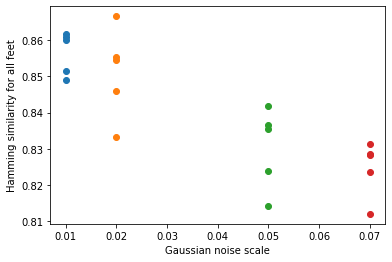

In [59]:
import matplotlib.pyplot as plt

NUM_TIMESTEPS = 200

google_blue = (66 / 256, 133 / 256, 244 / 256, 1)
google_red = (219 / 256, 68 / 256, 55 / 256, 1)
google_yellow = (244 / 256, 180 / 256, 0, 1)
google_green = (15 / 256, 157 / 256, 88 / 256, 1)

foot_names = ['FR', 'FL', 'RR', 'RL']
foot_colors = [google_blue, google_red, google_yellow, google_green]

def calc_hamming_sim(stats, by_foot=False):
    time = stats['time']
    ref_foot_contacts = stats['ref_foot_contacts']
    act_foot_contacts = stats['act_foot_contacts']

    # Divide by 2 since binary entries are [-1, 1] and not [0,1]
    diff = np.abs(ref_foot_contacts - act_foot_contacts) / 2
    hamming_dist = np.mean(diff, axis=0)
    if not by_foot:
        hamming_dist = np.mean(hamming_dist)
    hamming_sim = 1 - hamming_dist
    return hamming_sim

def plot_hamming_sim_dist(ax, noise_level, stats_collection):
    hamming_sims = []
    for seed, stats in stats_collection.items():
        hamming_sim = calc_hamming_sim(stats)
        print(noise_level, seed, hamming_sim)
        hamming_sims.append(hamming_sim)
    hamming_sims = np.array(hamming_sims)    

    ax.scatter([noise_level] * len(hamming_sims), hamming_sims)

def calc_vel_error(stats):
    target_vel = stats['']
    actual_vel = stats['base_velocity']


def plot_velocity_err_dist(ax, noise_level, stats_collection):
    hamming_sims = []
    for seed, stats in stats_collection.items():
        hamming_sim = calc_hamming_sim(stats)
        print(noise_level, seed, hamming_sim)
        hamming_sims.append(hamming_sim)
    hamming_sims = np.array(hamming_sims)    

    ax.scatter([noise_level] * len(hamming_sims), hamming_sims)

fig, ax = plt.subplots()
ax.set_xlabel("Gaussian noise scale")
ax.set_ylabel("Hamming similarity for all feet")
# ax.set_ylim(0, 1.1)

for noise_level, stats_collection in statss.items():
    plot_hamming_sim_dist(ax, noise_level, stats_collection)
    #for seed, stats in stats_collection.items():
    #    hamming_sim = calc_hamming_sim(stats)
    #    print(noise_level, seed, hamming_sim)

fig.savefig("with_sensor_noise.pdf", format="pdf", bbox_layout="tight")